In [2]:
#Run this cell

from datascience import *
from pandas import read_stata
import numpy as np
from pygrowup import Calculator

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

#Use the data that you imported at the beginning of Lab 4  
data = Table.read_table('Lab_3.csv')
data

Household ID,Individual ID,Day of Birth,Month of Birth,Birth Year,Age in Years,Sex,Height,Weight,Relationship to HH Head,Mother ID,Father ID,Currently Enrolled in School,Years of Schooling - Level,Years of Schooling - Years,Master ID,Day of Interview,Month of Interview,Year of Interview,Days Old,Years Old,Months Old,z_scores,Rounded Months
20111642,3,3,7,1976,31,2,1,-99,9,-99,-99,-99,2,5,-1363194477,10,7,2007,11329.8,31.0404,59,-22.86,59
20111642,4,10,9,1995,11,2,1,-99,5,3,2,1,-99,-99,-1363194476,10,7,2007,4322,11.8411,59,-22.86,59
20111642,5,20,4,1997,10,1,1,-99,5,3,2,1,-99,-99,-1363194475,10,7,2007,3734,10.2301,59,-23.58,59
20111642,6,26,12,1999,7,1,1,-99,5,3,2,-99,-99,-99,-1363194474,10,7,2007,2753.5,7.54384,59,-23.58,59
20111642,7,17,1,2000,7,1,1,-99,5,3,2,-99,-99,-99,-1363194473,10,7,2007,2732.75,7.48699,59,-23.58,59
20111642,8,26,5,2002,5,1,105.9,22.6,5,3,2,-99,-99,-99,-1363194472,10,7,2007,1871.25,5.12671,59,-0.76,59
20111642,9,5,1,2005,2,2,80.5,9.5,5,3,2,-99,-99,-99,-1363194471,10,7,2007,918.5,2.51644,30.1148,-2.88,30
20111642,10,12,4,2006,1,2,70.3,7.1,5,3,2,-99,-99,-99,-1363194470,10,7,2007,454.75,1.24589,14.9098,-2.27,15
20113642,1,13,4,1966,41,1,1,-99,1,-99,-99,-99,-99,-99,-1361194479,10,7,2007,15063.8,41.2705,59,-23.58,59
20113642,2,1,1,1969,38,2,1,-99,2,-99,-99,-99,-99,-99,-1361194478,10,7,2007,14071.5,38.5521,59,-22.86,59


In [3]:
# If you lost a lot of observations from too few birthdates, 
# copy the code you developed in Lab 4 to join those back in.

# Household Composition II

This week we will look at specific information about parents. Examine your data and find a household with a child that has both a mother and a father living in the household.  This means both Mother ID and Father ID are not empty.  Just looking at this one family, can you determine mother's age and father's age? How about mother's education and father's education? Hint: Be sure to use the correct education variable (likely 'Years of Schooling' rather than 'Currently Enrolled in School'.)  

Challenge yourself and try this activity with the kids who are living in the largest household in your data.

In [4]:
largest_hhold = data.group('Household ID').sort('count',descending = True).column('Household ID').item(0)
data.where(np.logical_and(data['Mother ID'] >= 0, data['Father ID'] >= 0)).where('Household ID', largest_hhold)

Household ID,Individual ID,Day of Birth,Month of Birth,Birth Year,Age in Years,Sex,Height,Weight,Relationship to HH Head,Mother ID,Father ID,Currently Enrolled in School,Years of Schooling - Level,Years of Schooling - Years,Master ID,Day of Interview,Month of Interview,Year of Interview,Days Old,Years Old,Months Old,z_scores,Rounded Months
33022430,3,1,1,1985,22,1,1,-99,3,2,1,-99,4,2,-1337308365,6,2,2007,8071,22.1123,59,-23.58,59
33022430,4,20,3,1988,18,2,1,-99,3,2,1,1,-99,-99,-1337308364,6,2,2007,6895.25,18.8911,59,-22.86,59
33022430,5,10,11,1991,15,2,1,-99,3,2,1,1,-99,-99,-1337308363,6,2,2007,5565.5,15.2479,59,-22.86,59
33022430,6,16,11,1995,11,2,1,-99,3,2,1,-99,-99,-99,-1337308362,6,2,2007,4098.5,11.2288,59,-22.86,59
33022430,7,20,12,2001,5,1,100.4,13.6,3,2,1,-99,-99,-99,-1337308361,6,2,2007,1872.5,5.13014,59,-1.96,59
33022430,8,23,2,2005,1,2,70.5,7.8,3,2,1,-99,-99,-99,-1337308360,6,2,2007,713.5,1.95479,23.3934,-4.73,23
33022430,9,18,12,2006,0,2,50.7,4,3,2,1,-99,-99,-99,-1337308359,6,2,2007,48.25,0.132192,1.58197,-2.2,2
33022430,12,16,3,2002,4,2,100.2,14.9,5,11,10,-99,-99,-99,-1337308356,6,2,2007,1785.75,4.89247,58.5492,-1.74,59
33022430,13,7,2,2003,3,1,80.7,10.7,5,11,10,-99,-99,-99,-1337308355,6,2,2007,1460,4,47.8689,-5.31,48
33022430,14,5,9,2004,2,1,80.1,11.2,5,11,10,-99,-99,-99,-1337308354,6,2,2007,883.25,2.41986,28.959,-3.13,29


### Additional Preparation

You probably have two or more schooling variables.  Combine them into a single column "Education" to simplify your data.  

Note: some data sets will have two variables for level of schooling and year.  For example, level is high school & years is 3. This person's years of schooling should be 11.  The code below illustrates what transformation you might have to do.  Check your questionnaire!

In [5]:
def yearsextra(x):
    if x==1: 
        return 0
    elif x==2: 
        return 0
    elif x==3: 
        return 6
    elif x==4: 
        return 9  
    elif x==5: 
        return 12 
    elif x==7: 
        return 12
    elif x==6: 
        return 14
    elif x==8: 
        return 6
    else:
        return -99
  
data['Extra Years']=data.apply(yearsextra, 'Years of Schooling - Level')
data['Education']=data['Years of Schooling - Years']+data['Extra Years']
data['Education']= [data['Education'][i] if data['Education'][i] > 0 else data['Currently Enrolled in School'][i] for i in range(data.num_rows)]
data

Household ID,Individual ID,Day of Birth,Month of Birth,Birth Year,Age in Years,Sex,Height,Weight,Relationship to HH Head,Mother ID,Father ID,Currently Enrolled in School,Years of Schooling - Level,Years of Schooling - Years,Master ID,Day of Interview,Month of Interview,Year of Interview,Days Old,Years Old,Months Old,z_scores,Rounded Months,Extra Years,Education
20111642,3,3,7,1976,31,2,1,-99,9,-99,-99,-99,2,5,-1363194477,10,7,2007,11329.8,31.0404,59,-22.86,59,0,5
20111642,4,10,9,1995,11,2,1,-99,5,3,2,1,-99,-99,-1363194476,10,7,2007,4322,11.8411,59,-22.86,59,-99,1
20111642,5,20,4,1997,10,1,1,-99,5,3,2,1,-99,-99,-1363194475,10,7,2007,3734,10.2301,59,-23.58,59,-99,1
20111642,6,26,12,1999,7,1,1,-99,5,3,2,-99,-99,-99,-1363194474,10,7,2007,2753.5,7.54384,59,-23.58,59,-99,-99
20111642,7,17,1,2000,7,1,1,-99,5,3,2,-99,-99,-99,-1363194473,10,7,2007,2732.75,7.48699,59,-23.58,59,-99,-99
20111642,8,26,5,2002,5,1,105.9,22.6,5,3,2,-99,-99,-99,-1363194472,10,7,2007,1871.25,5.12671,59,-0.76,59,-99,-99
20111642,9,5,1,2005,2,2,80.5,9.5,5,3,2,-99,-99,-99,-1363194471,10,7,2007,918.5,2.51644,30.1148,-2.88,30,-99,-99
20111642,10,12,4,2006,1,2,70.3,7.1,5,3,2,-99,-99,-99,-1363194470,10,7,2007,454.75,1.24589,14.9098,-2.27,15,-99,-99
20113642,1,13,4,1966,41,1,1,-99,1,-99,-99,-99,-99,-99,-1361194479,10,7,2007,15063.8,41.2705,59,-23.58,59,-99,-99
20113642,2,1,1,1969,38,2,1,-99,2,-99,-99,-99,-99,-99,-1361194478,10,7,2007,14071.5,38.5521,59,-22.86,59,-99,-99


We can do a quick check that the schooling makes sense and that people do not have more years of education than years of life.  Do a scatter plot comparing Age in years to Education (without the -99 values).

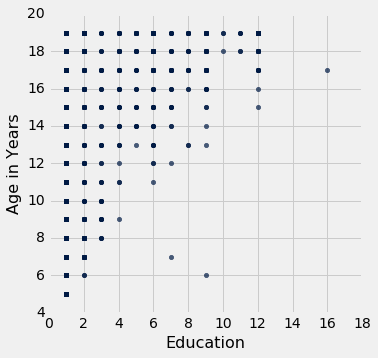

In [6]:
data.where(data['Education']>0).where('Age in Years', are.below(20)).scatter('Education', 'Age in Years')

Now that your Years of Education data looks good, drop the other education columns so you don't get confused ('Extra Years', 'Years of Schooling - Years', 'Years of Schooling - Level').  Keep 'Currently Enrolled'.

In [7]:
data=data.drop('Extra Years', 'Years of Schooling - Level', 'Years of Schooling - Years')
data
data.num_rows

23012

We will now join in information about mothers.

In [8]:
# Make a Mother Master ID: 
data['Mother Master ID']=data['Household ID']*1000+data['Mother ID']

# Make a table of information we want about mothers
data_on_moms=data.select('Household ID', 'Individual ID', 'Age in Years', 'Education', 'Relationship to HH Head')
data_on_moms=data_on_moms.relabel(['Age in Years', 'Education', 'Relationship to HH Head'],["Mom's Age", "Mom's Education", "Mom's Relation to Head"])

# Make a Mother Master ID: 
data_on_moms['Mother Master ID']=data['Household ID']*1000+data['Individual ID']

# Create a table with rows all -99 for children who do not have mothers in the household
data_on_moms_small=data_on_moms.group("Household ID")
data_on_moms_small=data_on_moms_small.select("Household ID")
data_on_moms_small['Individual ID']=-99
data_on_moms_small["Mom's Age"]=-99
data_on_moms_small["Mom's Education"]=-99
data_on_moms_small["Mom's Relation to Head"]=-99
data_on_moms_small['Mother Master ID']=data_on_moms_small['Household ID']*1000+data_on_moms_small['Individual ID']

#append households with no mother IDs to created mother IDs
data_on_moms=data_on_moms.append(data_on_moms_small)
data_on_moms=data_on_moms.drop('Household ID', 'Individual ID')
data_on_moms

# Join the mother information to the child using the Mother Master ID
data=data.join('Mother Master ID', data_on_moms, 'Mother Master ID')
data=data.drop('Mother Master ID')
data.show(100)


Household ID,Individual ID,Day of Birth,Month of Birth,Birth Year,Age in Years,Sex,Height,Weight,Relationship to HH Head,Mother ID,Father ID,Currently Enrolled in School,Master ID,Day of Interview,Month of Interview,Year of Interview,Days Old,Years Old,Months Old,z_scores,Rounded Months,Education,Mom's Age,Mom's Education,Mom's Relation to Head
20111642,3,3,7,1976,31,2,1,-99,9,-99,-99,-99,-1363194477,10,7,2007,11329.8,31.0404,59,-22.86,59,5,-99,-99,-99
20111642,4,10,9,1995,11,2,1,-99,5,3,2,1,-1363194476,10,7,2007,4322,11.8411,59,-22.86,59,1,31,5,9
20111642,5,20,4,1997,10,1,1,-99,5,3,2,1,-1363194475,10,7,2007,3734,10.2301,59,-23.58,59,1,31,5,9
20111642,6,26,12,1999,7,1,1,-99,5,3,2,-99,-1363194474,10,7,2007,2753.5,7.54384,59,-23.58,59,-99,31,5,9
20111642,7,17,1,2000,7,1,1,-99,5,3,2,-99,-1363194473,10,7,2007,2732.75,7.48699,59,-23.58,59,-99,31,5,9
20111642,8,26,5,2002,5,1,105.9,22.6,5,3,2,-99,-1363194472,10,7,2007,1871.25,5.12671,59,-0.76,59,-99,31,5,9
20111642,9,5,1,2005,2,2,80.5,9.5,5,3,2,-99,-1363194471,10,7,2007,918.5,2.51644,30.1148,-2.88,30,-99,31,5,9
20111642,10,12,4,2006,1,2,70.3,7.1,5,3,2,-99,-1363194470,10,7,2007,454.75,1.24589,14.9098,-2.27,15,-99,31,5,9
20113642,1,13,4,1966,41,1,1,-99,1,-99,-99,-99,-1361194479,10,7,2007,15063.8,41.2705,59,-23.58,59,-99,-99,-99,-99
20113642,2,1,1,1969,38,2,1,-99,2,-99,-99,-99,-1361194478,10,7,2007,14071.5,38.5521,59,-22.86,59,-99,-99,-99,-99


Sometimes joining brings in extra lines of data.  Make sure you still have the same number of people that you started out with in the original table.

Examine your data.  Do you now have information about mothers for children who have mothers?  Does it make sense? (i.e. generally were children born when their mother was older than age 15.)  Make sure you do not have information about mothers for individuals that do not have mothers in the household.

<font color="Blue"> Item 0: Make a new variable: Mother's age when child was born.  What is the youngest age at which a mother had a baby in your data set?

Do the same for fathers: Dad's Age, Dad's Education, and Dad's Relation to Head

In [9]:
# Make a Father Master ID: 
data['Father Master ID']=data['Household ID']*1000+data['Father ID']

# Make a table of information we want about fathers
data_on_dads=data.select('Household ID', 'Individual ID', 'Age in Years', 'Education', 'Relationship to HH Head')
data_on_dads=data_on_dads.relabel(['Age in Years', 'Education', 'Relationship to HH Head'],["Dad's Age", "Dad's Education", "Dad's Relation to Head"])

# Make a Father Master ID: 
data_on_dads['Father Master ID']=data['Household ID']*1000+data['Individual ID']

# Create a table with rows all -99 for children who do not have fathers in the household
data_on_dads_small=data_on_dads.group("Household ID")
data_on_dads_small=data_on_dads_small.select("Household ID")
data_on_dads_small['Individual ID']=-99
data_on_dads_small["Dad's Age"]=-99
data_on_dads_small["Dad's Education"]=-99
data_on_dads_small["Dad's Relation to Head"]=-99
data_on_dads_small['Father Master ID']=data_on_dads_small['Household ID']*1000+data_on_dads_small['Individual ID']

#append households with no mother IDs to created father IDs
data_on_dads=data_on_dads.append(data_on_dads_small)
data_on_dads=data_on_dads.drop('Household ID', 'Individual ID')
data_on_dads

# Join the father information to the child using the Father Master ID
data=data.join('Father Master ID', data_on_dads, 'Father Master ID')
data=data.drop('Father Master ID')
data.show(100)

Household ID,Individual ID,Day of Birth,Month of Birth,Birth Year,Age in Years,Sex,Height,Weight,Relationship to HH Head,Mother ID,Father ID,Currently Enrolled in School,Master ID,Day of Interview,Month of Interview,Year of Interview,Days Old,Years Old,Months Old,z_scores,Rounded Months,Education,Mom's Age,Mom's Education,Mom's Relation to Head,Dad's Age,Dad's Education,Dad's Relation to Head
20111642,3,3,7,1976,31,2,1,-99,9,-99,-99,-99,-1363194477,10,7,2007,11329.8,31.0404,59,-22.86,59,5,-99,-99,-99,-99,-99,-99
20113642,1,13,4,1966,41,1,1,-99,1,-99,-99,-99,-1361194479,10,7,2007,15063.8,41.2705,59,-23.58,59,-99,-99,-99,-99,-99,-99,-99
20113642,2,1,1,1969,38,2,1,-99,2,-99,-99,-99,-1361194478,10,7,2007,14071.5,38.5521,59,-22.86,59,-99,-99,-99,-99,-99,-99,-99
20113642,3,5,1,1998,9,1,1,-99,3,2,1,-99,-1361194477,10,7,2007,3475.25,9.52123,59,-23.58,59,-99,38,-99,2,41,-99,1
20113642,4,4,9,1999,7,1,1,-99,3,2,1,-99,-1361194476,10,7,2007,2867,7.85479,59,-23.58,59,-99,38,-99,2,41,-99,1
20113642,5,22,9,2001,5,1,113.6,13.7,3,2,1,-99,-1361194475,10,7,2007,2118.5,5.80411,59,0.91,59,-99,38,-99,2,41,-99,1
20113642,6,5,9,2003,3,1,89.5,11.1,3,2,1,-99,-1361194474,10,7,2007,1405,3.84932,46.0656,-3.08,46,-99,38,-99,2,41,-99,1
20113642,7,4,8,2005,1,2,74.6,8.1,3,2,1,-99,-1361194473,10,7,2007,706,1.93425,23.1475,-3.44,23,-99,38,-99,2,41,-99,1
20114642,1,2,6,1980,27,1,1,-99,1,-99,-99,-99,-1360194479,10,7,2007,9900.25,27.124,59,-23.58,59,6,-99,-99,-99,-99,-99,-99
20114642,2,15,3,1982,25,2,1,-99,2,-99,-99,-99,-1360194478,10,7,2007,9248.25,25.3377,59,-22.86,59,-99,-99,-99,-99,-99,-99,-99


In Lab 4 we looked at nuclear families by checking if members were children of the head of the household. This method leaves out the possibility of step-children.  To be sure we get nuclear families and not blended families, we need to make sure the children are children of both the head and the spouse of the head.  <font color="Blue"> Item 1: What percentage of children are children with married parents (and one is the household head.)

 <font color="Black"> Hint (not in student version): We can do this by using the relationship of the mother and father to the head of the household. In the nuclear family, either mother or father is head, and the other is spouse.  Those usually take on the codes 1 & 2.  So Mother's Relation to Head + Father's Relation to Head shoudld be 3.  Make a new "Child of Married Head" column.

In [11]:
data["Child of Married Head"]=[1 if data["Mom's Relation to Head"][i]+data["Dad's Relation to Head"][i]==3 else 0 for i in range(data.num_rows)]


<font color="Blue"> Item 2:  This does not exactly fit with the nuclear family definition.  What else would you need to do ensure only nuclear families and all nuclear families. (Don't code, just describe.) 

Save your data.

## Let's examine if parent's education is associated with child outcomes.

Today's article suggests mother's eduction is better correlated with nutrition than father education.  <font color="Blue"> Item 3:  Make a scatter plot of z-scores by father's education level.  Make another by mother's education level. Do your initial findings align with the article? (Be sure to only graph the children and eliminate the missing values.)

<font color="Blue"> Item 4: Let's see if we get a clearer picture by using mean: Calculate mean z-scores by mothers' and fathers' education levels.  Graph these and comment on your findings. 

Z-scores are just for kids age 5 and under.  Let's check out how the older kids are doing. 
<font color="Blue"> Item 5:  Calculate percent of 14-18 year olds currently enrolled in school by mother's and father's education level.

<font color="Black"> Hint: After confirming enrollment values, make a small table only including children of those ages and then pivot enrollment around mother's and father's education levels.

## Big challenge!
Can you determine the age and education of grandparents?  Specifically, maternal grandmother, maternal grandfather, paternal grandmother, and paternal grandfather.  Hint: what if earlier you also included Mother's Mother's ID in the mother data base used for joining.  Again, try looking at the largest family to see how this works before attempting the coding.